In [1]:
#I have 3 datasets from NYC OPENDATA that I am going to clean. 


In [68]:
import pandas as pd
import os

In [69]:
# Path to data folder relative to the notebook
DATA_DIR = os.path.join("..", "data", "raw")


In [4]:
#Clean bus evasion dataset

In [5]:
bus_evasion_df = pd.read_csv(os.path.join(DATA_DIR, "MTA_Bus_Fare_Evasion__Beginning_2019_20250721.csv"))
#subway_evasion_df = pd.read_csv(os.path.join(DATA_DIR, "MTA_NYCT_Subway_Fare_Evasion__Beginning_2018_20250721.csv"))
#ridership_df = pd.read_csv(os.path.join(DATA_DIR, "MTA_Daily_Ridership_Data__2020_-_2025_20250721.csv"))


In [6]:
bus_evasion_df.head(10)

,Time Period,Trip Type,Fare Evasion
0,2019-Q1,Local,0.250
1,2019-Q2,Local,0.279
2,2019-Q3,Local,0.210
3,2019-Q4,Local,0.206
4,2020-Q1,Local,0.211
5,2020-Q2,Local,NaN
6,2020-Q3,Local,NaN
7,2020-Q4,Local,0.233
8,2020-Q4,Express,0.047
9,2021-Q1,Local,0.236


In [7]:
bus_evasion_df.info()
bus_evasion_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time Period   78 non-null     object 
 1   Trip Type     78 non-null     object 
 2   Fare Evasion  76 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.0+ KB


,Fare Evasion
count,76.000000
mean,0.303678
std,0.165992
min,0.036000
25%,0.209000
50%,0.327500
75%,0.441250
max,0.576000


In [8]:
bus_evasion_df['Fare Evasion'] = bus_evasion_df['Fare Evasion'].interpolate(method='linear')


In [9]:
# First create a datetime column
bus_evasion_df['Year'] = bus_evasion_df['Time Period'].str[:4].astype(int)
bus_evasion_df['Quarter'] = bus_evasion_df['Time Period'].str[-2:]

# Map quarter to month for datetime approximation (e.g. Q1 → Feb)
quarter_month_map = {'Q1': 2, 'Q2': 5, 'Q3': 8, 'Q4': 11}
bus_evasion_df['Month'] = bus_evasion_df['Quarter'].map(quarter_month_map)

# Combine into a datetime
bus_evasion_df['Date'] = pd.to_datetime(dict(year=bus_evasion_df.Year, month=bus_evasion_df.Month, day=1))
bus_evasion_df['Mode'] = "Buses"

In [10]:
bus_evasion_df

,Time Period,Trip Type,Fare Evasion,Year,Quarter,Month,Date,Mode
0,2019-Q1,Local,0.250,2019,Q1,2,2019-02-01,Buses
1,2019-Q2,Local,0.279,2019,Q2,5,2019-05-01,Buses
2,2019-Q3,Local,0.210,2019,Q3,8,2019-08-01,Buses
3,2019-Q4,Local,0.206,2019,Q4,11,2019-11-01,Buses
4,2020-Q1,Local,0.211,2020,Q1,2,2020-02-01,Buses
...,...,...,...,...,...,...,...,...
73,2024-Q4,Total,0.449,2024,Q4,11,2024-11-01,Buses
74,2025-Q1,Express,0.036,2025,Q1,2,2025-02-01,Buses
75,2025-Q1,Local,0.430,2025,Q1,2,2025-02-01,Buses
76,2025-Q1,SBS,0.558,2025,Q1,2,2025-02-01,Buses


In [11]:
# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Construct the full path to the output file
output_path = os.path.join(project_root, "data", "processed", "bus_evasion_df.csv")

# Save the CSV
bus_evasion_df.to_csv(output_path, index=False)

In [12]:
#Clean Subway Evasion Dataset

In [13]:
subway_evasion_df = pd.read_csv(os.path.join(DATA_DIR, "MTA_NYCT_Subway_Fare_Evasion__Beginning_2018_20250721.csv"))


In [14]:
subway_evasion_df.head(20)

,Time Period,Fare Evasion,Margin of Error
0,2018-Q1,0.028,NaN
1,2018-Q2,0.029,NaN
2,2018-Q3,0.038,NaN
3,2018-Q4,0.034,NaN
4,2019-Q1,0.039,NaN
5,2019-Q2,0.039,NaN
6,2019-Q3,0.057,NaN
7,2019-Q4,0.049,NaN
8,2020-Q1,0.062,0.013
9,2020-Q2,NaN,NaN


In [15]:
subway_evasion_df.info()
subway_evasion_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time Period      29 non-null     object 
 1   Fare Evasion     28 non-null     float64
 2   Margin of Error  20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 824.0+ bytes


,Fare Evasion,Margin of Error
count,28.000000,20.000000
mean,0.095321,0.011050
std,0.040236,0.002481
min,0.028000,0.008000
25%,0.055000,0.009000
50%,0.108500,0.011000
75%,0.131500,0.012000
max,0.140000,0.016000


In [16]:
# Option 1: leave as is
# Option 2: subway_evasion_df.drop(columns="Margin of Error", inplace=True)
# Option 3: Estimate using post-2020 values
post_2020 = subway_evasion_df[subway_evasion_df["Margin of Error"].notna()]
avg_ratio = (post_2020["Margin of Error"] / post_2020["Fare Evasion"]).mean()
subway_evasion_df["Margin of Error"] = subway_evasion_df["Margin of Error"].fillna(
    subway_evasion_df["Fare Evasion"] * avg_ratio
)


In [17]:
# Option A: Convert to datetime by using the first month of the quarter
#subway_evasion_df["Date"] = pd.to_datetime(subway_evasion_df["Time Period"].str.replace("Q", "-") + "-01")
# Option B: Use pandas Period for quarterly frequency
#subway_evasion_df["Quarter"] = pd.PeriodIndex(subway_evasion_df["Time Period"], freq='Q')

# First create a datetime column
subway_evasion_df['Year'] = subway_evasion_df['Time Period'].str[:4].astype(int)
subway_evasion_df['Quarter'] = subway_evasion_df['Time Period'].str[-2:]

# Map quarter to month for datetime approximation (e.g. Q1 → Feb)
quarter_month_map = {'Q1': 2, 'Q2': 5, 'Q3': 8, 'Q4': 11}
subway_evasion_df['Month'] = subway_evasion_df['Quarter'].map(quarter_month_map)

# Combine into a datetime
bus_evasion_df['Date'] = pd.to_datetime(dict(year=bus_evasion_df.Year, month=bus_evasion_df.Month, day=1))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time Period      29 non-null     object 
 1   Fare Evasion     28 non-null     float64
 2   Margin of Error  28 non-null     float64
 3   Year             29 non-null     int64  
 4   Quarter          29 non-null     object 
 5   Month            29 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.5+ KB


<Axes: >

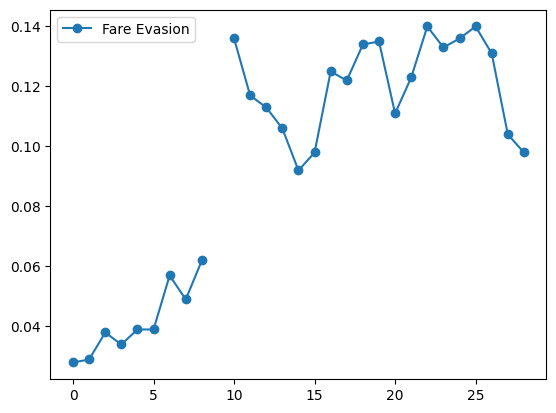

In [18]:
subway_evasion_df.info()
subway_evasion_df.describe()
subway_evasion_df.plot(y="Fare Evasion", use_index=True, marker='o')


In [19]:
subway_evasion_df.head(20)

,Time Period,Fare Evasion,Margin of Error,Year,Quarter,Month
0,2018-Q1,0.028,0.002733,2018,Q1,2
1,2018-Q2,0.029,0.002831,2018,Q2,5
2,2018-Q3,0.038,0.003709,2018,Q3,8
3,2018-Q4,0.034,0.003319,2018,Q4,11
4,2019-Q1,0.039,0.003807,2019,Q1,2
5,2019-Q2,0.039,0.003807,2019,Q2,5
6,2019-Q3,0.057,0.005564,2019,Q3,8
7,2019-Q4,0.049,0.004783,2019,Q4,11
8,2020-Q1,0.062,0.013000,2020,Q1,2
9,2020-Q2,NaN,NaN,2020,Q2,5


In [20]:
# Ensure the Fare Evasion and Margin of Error columns are numeric
subway_evasion_df['Fare Evasion'] = pd.to_numeric(subway_evasion_df['Fare Evasion'], errors='coerce')
subway_evasion_df['Margin of Error'] = pd.to_numeric(subway_evasion_df['Margin of Error'], errors='coerce')

# Interpolate the NaNs
subway_evasion_df[['Fare Evasion', 'Margin of Error']] = subway_evasion_df[['Fare Evasion', 'Margin of Error']].interpolate(method='linear')
subway_evasion_df["Mode"] = "Subways"


In [21]:
subway_evasion_df

,Time Period,Fare Evasion,Margin of Error,Year,Quarter,Month,Mode
0,2018-Q1,0.028,0.002733,2018,Q1,2,Subways
1,2018-Q2,0.029,0.002831,2018,Q2,5,Subways
2,2018-Q3,0.038,0.003709,2018,Q3,8,Subways
3,2018-Q4,0.034,0.003319,2018,Q4,11,Subways
4,2019-Q1,0.039,0.003807,2019,Q1,2,Subways
5,2019-Q2,0.039,0.003807,2019,Q2,5,Subways
6,2019-Q3,0.057,0.005564,2019,Q3,8,Subways
7,2019-Q4,0.049,0.004783,2019,Q4,11,Subways
8,2020-Q1,0.062,0.013000,2020,Q1,2,Subways
9,2020-Q2,0.099,0.012000,2020,Q2,5,Subways


In [22]:
# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Construct the full path to the output file
output_path = os.path.join(project_root, "data", "processed", "subway_evasion_df.csv")

# Save the CSV
subway_evasion_df.to_csv(output_path, index=False)

In [23]:
#MTA Daily ridership data

In [24]:
ridership_df = pd.read_csv(os.path.join(DATA_DIR, "MTA_Daily_Ridership_Data__2020_-_2025_20250721.csv"))


In [25]:
ridership_df.head(10)

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
0,03/01/2020,2212965,0.97,984908,0.99,86790,1.00,55825,0.59,19922,1.13,786960,0.98,1636,0.52
1,03/02/2020,5329915,0.96,2209066,0.99,321569,1.03,180701,0.66,30338,1.02,874619,0.95,17140,1.07
2,03/03/2020,5481103,0.98,2228608,0.99,319727,1.02,190648,0.69,32767,1.10,882175,0.96,17453,1.09
3,03/04/2020,5498809,0.99,2177165,0.97,311662,0.99,192689,0.70,34297,1.15,905558,0.98,17136,1.07
4,03/05/2020,5496453,0.99,2244515,1.00,307597,0.98,194386,0.70,33209,1.12,929298,1.01,17203,1.08
5,03/06/2020,5189447,0.93,2066743,0.92,289171,0.92,205056,0.74,30970,1.04,945408,1.03,15285,0.96
6,03/07/2020,2814637,0.92,1249085,0.94,106058,0.98,75838,0.56,18117,1.07,827907,0.95,2445,0.48
7,03/08/2020,2120656,0.93,957163,0.96,81565,0.94,60800,0.64,19477,1.11,765083,0.95,1672,0.53
8,03/09/2020,4973513,0.89,2124770,0.95,277001,0.88,183953,0.67,29609,1.00,860073,0.93,16122,1.01
9,03/10/2020,4867818,0.87,2111989,0.94,259324,0.83,179050,0.65,31315,1.05,855585,0.93,15805,0.99


In [26]:
ridership_df.info()
ridership_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 15 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Date                                                     1776 non-null   object 
 1   Subways: Total Estimated Ridership                       1776 non-null   int64  
 2   Subways: % of Comparable Pre-Pandemic Day                1776 non-null   float64
 3   Buses: Total Estimated Ridership                         1776 non-null   int64  
 4   Buses: % of Comparable Pre-Pandemic Day                  1776 non-null   float64
 5   LIRR: Total Estimated Ridership                          1776 non-null   int64  
 6   LIRR: % of Comparable Pre-Pandemic Day                   1776 non-null   float64
 7   Metro-North: Total Estimated Ridership                   1776 non-null   int64  
 8   Metro-North: % of Comparable

,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
count,1.776000e+03,1776.000000,1.776000e+03,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1.776000e+03,1776.000000,1776.000000,1776.000000
mean,2.541830e+06,0.563615,1.011409e+06,0.551644,138783.668919,0.607432,117522.400338,0.525631,22349.481982,0.878846,8.572596e+05,0.937297,4491.962838,0.387934
std,1.067641e+06,0.201075,4.369798e+05,0.191883,72243.727072,0.308112,67232.358363,0.272096,8232.384206,0.257712,1.412100e+05,0.144921,2700.110378,0.202076
min,1.983990e+05,0.070000,5.498000e+03,0.010000,1903.000000,0.020000,3281.000000,0.030000,2506.000000,0.130000,1.567590e+05,0.180000,0.000000,0.000000
25%,1.735692e+06,0.420000,7.186188e+05,0.530000,80255.750000,0.377500,53755.000000,0.310000,16250.000000,0.720000,8.139142e+05,0.910000,2121.500000,0.260000
50%,2.505354e+06,0.610000,1.143659e+06,0.600000,127684.500000,0.620000,111431.000000,0.575000,22462.000000,0.850000,8.972120e+05,0.980000,4568.500000,0.400000
75%,3.476191e+06,0.700000,1.350378e+06,0.650000,201384.750000,0.770000,180373.250000,0.720000,28125.000000,1.060000,9.472925e+05,1.020000,6845.500000,0.470000
max,5.498809e+06,1.430000,2.244515e+06,1.260000,321569.000000,2.570000,249585.000000,2.110000,41858.000000,1.770000,1.043802e+06,1.200000,17453.000000,1.820000


In [27]:
# Remove extra spaces and standardize names
ridership_df.columns = ridership_df.columns.str.strip()


In [28]:
ridership_long = pd.melt(
    ridership_df,
    id_vars=["Date"],
    var_name="Mode_Metric",
    value_name="Value"
)


In [29]:
# Split on ": " to get Mode and Metric
ridership_long[['Mode', 'Metric']] = ridership_long['Mode_Metric'].str.split(': ', expand=True)

# Drop the combined column
ridership_long = ridership_long.drop(columns='Mode_Metric')


In [30]:
ridership_long

,Date,Value,Mode,Metric
0,03/01/2020,2212965.00,Subways,Total Estimated Ridership
1,03/02/2020,5329915.00,Subways,Total Estimated Ridership
2,03/03/2020,5481103.00,Subways,Total Estimated Ridership
3,03/04/2020,5498809.00,Subways,Total Estimated Ridership
4,03/05/2020,5496453.00,Subways,Total Estimated Ridership
...,...,...,...,...
24859,01/05/2025,0.74,Staten Island Railway,% of Comparable Pre-Pandemic Day
24860,01/06/2025,0.42,Staten Island Railway,% of Comparable Pre-Pandemic Day
24861,01/07/2025,0.45,Staten Island Railway,% of Comparable Pre-Pandemic Day
24862,01/08/2025,0.48,Staten Island Railway,% of Comparable Pre-Pandemic Day


In [31]:
ridership_long.columns

Index(['Date', 'Value', 'Mode', 'Metric'], dtype='object')

In [32]:
# Ensure 'Date' column is in datetime format
ridership_long['Date'] = pd.to_datetime(ridership_long['Date'])

# Add Year, Month, Quarter columns
ridership_long['Year'] = ridership_long['Date'].dt.year
ridership_long['Month'] = ridership_long['Date'].dt.month
ridership_long['Quarter'] = ridership_long['Date'].dt.to_period('Q').astype(str)

# Optional: Add month name if desired
ridership_long['Month_Name'] = ridership_long['Date'].dt.month_name()
# Strip the year from the 'Quarter' column, leaving just 'Q1', 'Q2', etc.
ridership_long['Quarter'] = ridership_long['Quarter'].str.extract(r'(Q[1-4])')


In [33]:
# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Construct the full path to the output file
output_path = os.path.join(project_root, "data", "processed", "ridership_long.csv")

# Save the CSV
ridership_long.to_csv(output_path, index=False)

In [34]:
ridership_long

,Date,Value,Mode,Metric,Year,Month,Quarter,Month_Name
0,2020-03-01,2212965.00,Subways,Total Estimated Ridership,2020,3,Q1,March
1,2020-03-02,5329915.00,Subways,Total Estimated Ridership,2020,3,Q1,March
2,2020-03-03,5481103.00,Subways,Total Estimated Ridership,2020,3,Q1,March
3,2020-03-04,5498809.00,Subways,Total Estimated Ridership,2020,3,Q1,March
4,2020-03-05,5496453.00,Subways,Total Estimated Ridership,2020,3,Q1,March
...,...,...,...,...,...,...,...,...
24859,2025-01-05,0.74,Staten Island Railway,% of Comparable Pre-Pandemic Day,2025,1,Q1,January
24860,2025-01-06,0.42,Staten Island Railway,% of Comparable Pre-Pandemic Day,2025,1,Q1,January
24861,2025-01-07,0.45,Staten Island Railway,% of Comparable Pre-Pandemic Day,2025,1,Q1,January
24862,2025-01-08,0.48,Staten Island Railway,% of Comparable Pre-Pandemic Day,2025,1,Q1,January


In [35]:
import calendar

bus_monthly_stats = ridership_long[(ridership_long['Mode']=='Buses') & (ridership_long['Metric']=='% of Comparable Pre-Pandemic Day')]
#df_filtered = df_joined_bus_final[(df_joined_bus_final['Year'] >= 2021) & (df_joined_bus_final['Year'] <= 2024)]

bus_monthly_stats = bus_monthly_stats.groupby(['Year', 'Month', 'Metric', 'Quarter'])['Value'].mean().reset_index()

# Convert numeric Month to full month name
bus_monthly_stats['Month'] = bus_monthly_stats['Month'].apply(lambda x: calendar.month_name[x])


# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Construct the full path to the output file
output_path = os.path.join(project_root, "data", "processed", "bus_monthly_stats.csv")

# Save the CSV
bus_monthly_stats.to_csv(output_path, index=False)
bus_monthly_stats

,Year,Month,Metric,Quarter,Value
0,2020,March,% of Comparable Pre-Pandemic Day,Q1,0.534194
1,2020,April,% of Comparable Pre-Pandemic Day,Q2,0.010000
2,2020,May,% of Comparable Pre-Pandemic Day,Q2,0.010000
3,2020,June,% of Comparable Pre-Pandemic Day,Q2,0.012000
4,2020,July,% of Comparable Pre-Pandemic Day,Q3,0.015806
5,2020,August,% of Comparable Pre-Pandemic Day,Q3,0.028387
6,2020,September,% of Comparable Pre-Pandemic Day,Q3,0.477000
7,2020,October,% of Comparable Pre-Pandemic Day,Q4,0.506452
8,2020,November,% of Comparable Pre-Pandemic Day,Q4,0.531333
9,2020,December,% of Comparable Pre-Pandemic Day,Q4,0.488065


In [36]:
# Group by Year, Quarter, Metric, and Mode to get mean and variance
quarterly_stats = (
    ridership_long
    .groupby(['Year', 'Quarter', 'Metric', 'Mode'], as_index=False)
    .agg(
        Avg_Value=('Value', 'mean'),
        Var_Value=('Value', 'var'),
        Sum_Value=('Value', 'sum')
    )
)

# Optional: round results
quarterly_stats['Avg_Value'] = quarterly_stats['Avg_Value'].round(2)
quarterly_stats['Var_Value'] = quarterly_stats['Var_Value'].round(2)


In [37]:
# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Construct the full path to the output file
output_path = os.path.join(project_root, "data", "processed", "quarterly_stats.csv")

# Save the CSV
quarterly_stats.to_csv(output_path, index=False)

In [38]:
quarterly_stats

,Year,Quarter,Metric,Mode,Avg_Value,Var_Value,Sum_Value
0,2020,Q1,% of Comparable Pre-Pandemic Day,Access-A-Ride,0.69,1.300000e-01,21.25
1,2020,Q1,% of Comparable Pre-Pandemic Day,Bridges and Tunnels,0.69,7.000000e-02,21.40
2,2020,Q1,% of Comparable Pre-Pandemic Day,Buses,0.53,1.700000e-01,16.56
3,2020,Q1,% of Comparable Pre-Pandemic Day,LIRR,0.46,1.500000e-01,14.38
4,2020,Q1,% of Comparable Pre-Pandemic Day,Metro-North,0.52,3.000000e-02,15.99
...,...,...,...,...,...,...,...
289,2025,Q1,Total Estimated Ridership,Metro-North,157338.44,3.340104e+09,1416046.00
290,2025,Q1,Total Estimated Ridership,Staten Island Railway,5386.33,5.766114e+06,48477.00
291,2025,Q1,Total Estimated Ridership,Subways,3050981.78,7.174993e+11,27458836.00
292,2025,Q1,Total Scheduled Trips,Access-A-Ride,30774.56,8.784393e+07,276971.00


In [39]:
#Taking a look at the Mckinsey Projection Dataset

In [40]:
mckinsey_df = pd.read_csv(os.path.join(DATA_DIR, "MTA_McKinsey_Ridership_Projections__October_2020_-_December_2026.csv"))
# Step 1: Convert Month column to datetime
mckinsey_df['Month'] = pd.to_datetime(mckinsey_df['Month'])

# Step 2: Rename Month column to Date
mckinsey_df.rename(columns={'Month': 'Date'}, inplace=True)

# Step 3: Create Month and Year columns
mckinsey_df['Month'] = mckinsey_df['Date'].dt.strftime('%B')  # Full month name (e.g., October)
mckinsey_df['Year'] = mckinsey_df['Date'].dt.year
mckinsey_df

,Date,Agency,Projection,Recovery,Month,Year
0,2020-10-01,Subway,Best Case (Dec 2020),0.3300,October,2020
1,2020-10-01,Subway,Midpoint (Dec 2020),0.3300,October,2020
2,2020-10-01,Subway,Worst Case (Dec 2020),0.3300,October,2020
3,2020-10-01,Bus,Best Case (Dec 2020),0.4500,October,2020
4,2020-10-01,Bus,Midpoint (Dec 2020),0.4500,October,2020
...,...,...,...,...,...,...
2704,2026-12-01,SIR,Midpoint (Apr 2022),0.7271,December,2026
2705,2026-12-01,SIR,Worst Case (Apr 2022),0.7270,December,2026
2706,2026-12-01,MTA Consolidated,Best Case (Apr 2022),0.8810,December,2026
2707,2026-12-01,MTA Consolidated,Midpoint (Apr 2022),0.8040,December,2026


In [41]:
# Ensure the 'Month' column is datetime
#mckinsey_df['Month'] = pd.to_datetime(mckinsey_df['Month'])

# Extract the scenario name from 'Projection' (e.g., "Best Case", "Midpoint", etc.)
mckinsey_df['Scenario'] = mckinsey_df['Projection'].str.extract(r'^(.*?)\s*\(')

# Format the month-year part as "AbbreviatedMonth FullYear" (e.g., "Dec 2026")
mckinsey_df['Correct_MonthYear'] = mckinsey_df['Date'].dt.strftime('%b %Y')

# Reconstruct the corrected 'Projection' column
mckinsey_df['Projection'] = mckinsey_df['Scenario'] + ' (' + mckinsey_df['Correct_MonthYear'] + ')'

# Drop the helper columns
mckinsey_df.drop(columns=['Scenario', 'Correct_MonthYear'], inplace=True)



In [42]:
mckinsey_df

,Date,Agency,Projection,Recovery,Month,Year
0,2020-10-01,Subway,Best Case (Oct 2020),0.3300,October,2020
1,2020-10-01,Subway,Midpoint (Oct 2020),0.3300,October,2020
2,2020-10-01,Subway,Worst Case (Oct 2020),0.3300,October,2020
3,2020-10-01,Bus,Best Case (Oct 2020),0.4500,October,2020
4,2020-10-01,Bus,Midpoint (Oct 2020),0.4500,October,2020
...,...,...,...,...,...,...
2704,2026-12-01,SIR,Midpoint (Dec 2026),0.7271,December,2026
2705,2026-12-01,SIR,Worst Case (Dec 2026),0.7270,December,2026
2706,2026-12-01,MTA Consolidated,Best Case (Dec 2026),0.8810,December,2026
2707,2026-12-01,MTA Consolidated,Midpoint (Dec 2026),0.8040,December,2026


In [43]:
mckinsey_df = mckinsey_df[mckinsey_df['Agency'] == 'Bus']
#mckinsey_df.to_csv('/Users/danielbrown/Desktop/mckinsey_df.csv', index=False)

mckinsey_df = mckinsey_df.drop_duplicates(subset=['Month', 'Agency', 'Projection'], keep='first')
#mckinsey_df.to_csv('/Users/danielbrown/Desktop/mckinsey_df_1.csv', index=False)

# Remove the month-year part from the Projection column
mckinsey_df["Projection"] = mckinsey_df["Projection"].str.replace(r"\s+\([^)]+\)", "", regex=True)

# Optional: Check the result
print(mckinsey_df["Projection"].unique())

# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Construct the full path to the output file
output_path = os.path.join(project_root, "data", "processed", "mckinsey_df.csv")

# Save the CSV
mckinsey_df.to_csv(output_path, index=False)

mckinsey_df

['Best Case' 'Midpoint' 'Worst Case']


,Date,Agency,Projection,Recovery,Month,Year
3,2020-10-01,Bus,Best Case,0.4500,October,2020
4,2020-10-01,Bus,Midpoint,0.4500,October,2020
5,2020-10-01,Bus,Worst Case,0.4500,October,2020
36,2020-11-01,Bus,Best Case,0.4500,November,2020
37,2020-11-01,Bus,Midpoint,0.4500,November,2020
...,...,...,...,...,...,...
2677,2026-11-01,Bus,Midpoint,0.8345,November,2026
2678,2026-11-01,Bus,Worst Case,0.7540,November,2026
2694,2026-12-01,Bus,Best Case,0.9160,December,2026
2695,2026-12-01,Bus,Midpoint,0.8355,December,2026


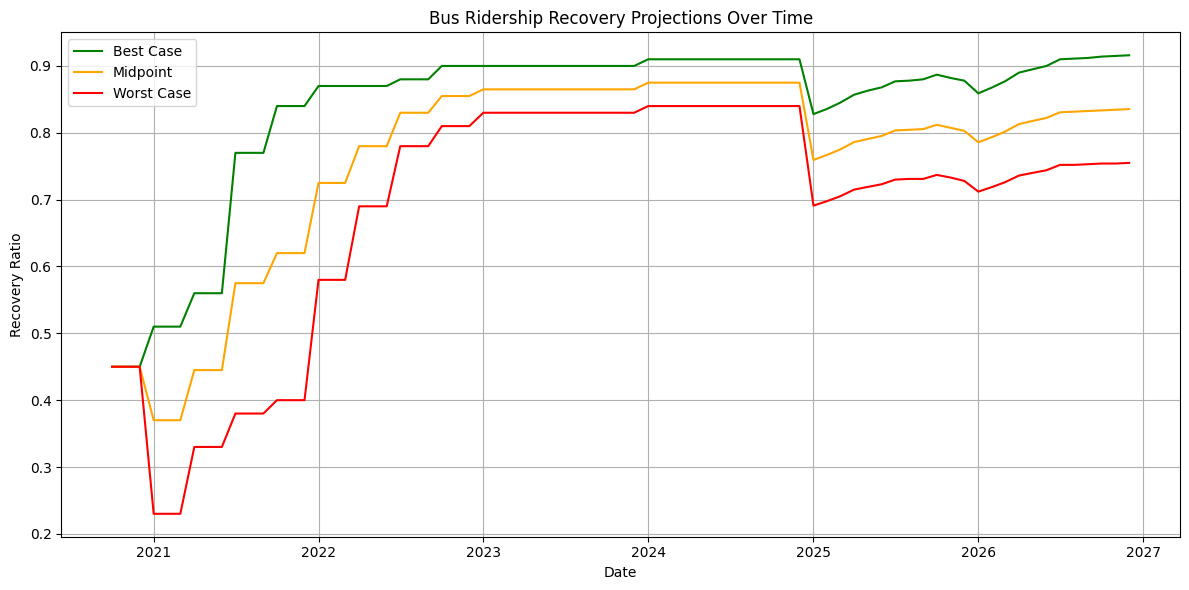

In [44]:
import matplotlib.pyplot as plt

# Filter just the Bus rows
bus_df = mckinsey_df[mckinsey_df['Agency'] == 'Bus'].sort_values('Date')

# Filter each scenario explicitly
best = bus_df[bus_df['Projection'].str.startswith('Best Case')]
mid = bus_df[bus_df['Projection'].str.startswith('Midpoint')]
worst = bus_df[bus_df['Projection'].str.startswith('Worst Case')]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(best['Date'], best['Recovery'], label='Best Case', color='green')
plt.plot(mid['Date'], mid['Recovery'], label='Midpoint', color='orange')
plt.plot(worst['Date'], worst['Recovery'], label='Worst Case', color='red')

# Formatting
plt.title('Bus Ridership Recovery Projections Over Time')
plt.xlabel('Date')
plt.ylabel('Recovery Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
#Exploring the dataset that has No. Entrances each station hourly and how many are transfer
#Goal: To find the % of transfers. I want to do this to get an idea of how many people that pay fares
#are just going to transfer anyway, or have transfered. This might be another reason to make buses free
#because these people are just going to transfer anyway
#Assuming all transfers are coming from a bus

In [46]:
transfer_df = pd.read_csv(os.path.join(DATA_DIR, "mta_random_days_10.csv"))
transfer_df = transfer_df[['borough','ridership','transfers','transit_mode']]
transfer_df

,borough,ridership,transfers,transit_mode
0,Queens,1.0,0.0,subway
1,Brooklyn,2.0,0.0,subway
2,Brooklyn,9.0,0.0,subway
3,Manhattan,43.0,1.0,subway
4,Manhattan,8.0,0.0,subway
...,...,...,...,...
691756,Manhattan,2.0,0.0,subway
691757,Manhattan,61.0,1.0,subway
691758,Brooklyn,2.0,0.0,subway
691759,Brooklyn,1.0,0.0,subway


In [50]:
total_ridership = transfer_df["ridership"].sum()
print(f"Total ridership: {total_ridership:.0f}")


Total ridership: 28835025


In [51]:
double_transfers = 2 * transfer_df["transfers"].sum()
print(f"Double the number of transfers: {double_transfers:.0f}")


Double the number of transfers: 2326946


In [52]:
transfer_ratio = transfer_df["transfers"].sum() / transfer_df["ridership"].sum()
print(f"Transfer ratio: {transfer_ratio:.4f}")


Transfer ratio: 0.0403


In [53]:
by_borough = transfer_df.groupby("borough").agg({
    "ridership": "sum",
    "transfers": "sum"
})

by_borough["transfer_ratio"] = by_borough["transfers"] / by_borough["ridership"]
print(by_borough)


                ridership  transfers  transfer_ratio
borough                                             
Bronx           2052520.0   128804.0        0.062754
Brooklyn        6471771.0   270383.0        0.041779
Manhattan      15956255.0   337116.0        0.021128
Queens          4303180.0   414528.0        0.096331
Staten Island     51299.0    12642.0        0.246438


In [54]:
transfer_df = pd.read_csv(os.path.join(DATA_DIR, "mta_random_days_20.csv"))
transfer_df = transfer_df[['borough','ridership','transfers','transit_mode']]
transfer_df

,borough,ridership,transfers,transit_mode
0,Bronx,2.0,2.0,subway
1,Manhattan,3.0,0.0,subway
2,Brooklyn,1.0,0.0,subway
3,Queens,2.0,1.0,subway
4,Brooklyn,1.0,0.0,subway
...,...,...,...,...
1401776,Manhattan,32.0,0.0,subway
1401777,Manhattan,11.0,1.0,subway
1401778,Manhattan,48.0,0.0,subway
1401779,Brooklyn,4.0,0.0,subway


In [55]:
total_ridership = transfer_df["ridership"].sum()
print(f"Total ridership: {total_ridership:.0f}")

double_transfers = 2 * transfer_df["transfers"].sum()
print(f"Double the number of transfers: {double_transfers:.0f}")

transfer_ratio = transfer_df["transfers"].sum() / transfer_df["ridership"].sum()
print(f"Transfer ratio: {transfer_ratio:.4f}")

by_borough = transfer_df.groupby("borough").agg({
    "ridership": "sum",
    "transfers": "sum"
})

by_borough["transfer_ratio"] = by_borough["transfers"] / by_borough["ridership"]
print(by_borough)



Total ridership: 60711820
Double the number of transfers: 5305980
Transfer ratio: 0.0437
                ridership  transfers  transfer_ratio
borough                                             
Bronx           4745923.0   320678.0        0.067569
Brooklyn       13758432.0   626258.0        0.045518
Manhattan      32794942.0   733012.0        0.022351
Queens          9297731.0   944526.0        0.101587
Staten Island    114792.0    28516.0        0.248415


In [ ]:
#Bus Speed

In [7]:
# Path to data folder relative to the notebook
DATA_DIR = os.path.join("..", "data", "raw")
bus_evasion_df_2015 = pd.read_csv(os.path.join(DATA_DIR, "MTA_Bus_Speeds__2015-2019_20250819.csv"))
bus_evasion_df_2020 = pd.read_csv(os.path.join(DATA_DIR, "MTA_Bus_Speeds__2020_-_2024_20250819.csv"))
bus_evasion_df_2025 = pd.read_csv(os.path.join(DATA_DIR, "MTA_Bus_Speeds__Beginning_2025.csv"))

In [8]:
# Append (stack them vertically)
df_bus_speed = pd.concat([bus_evasion_df_2015, bus_evasion_df_2020, bus_evasion_df_2025], ignore_index=True)

In [9]:
df_bus_speed

,month,borough,day_type,trip_type,route_id,period,total_operating_time,total_mileage,average_speed
0,2015-01-01,Bronx,1,LCL/LTD,BX1,Off-Peak,8710307,6.294090e+07,7.230000
1,2015-01-01,Bronx,1,LCL/LTD,BX1,Peak,4334312,3.031650e+07,6.990000
2,2015-01-01,Bronx,2,LCL/LTD,BX1,Off-Peak,2498651,1.874216e+07,7.500000
3,2015-01-01,Bronx,2,LCL/LTD,BX1,Peak,1008139,7.417580e+06,7.360000
4,2015-01-01,Bronx,1,LCL/LTD,BX10,Off-Peak,5778595,5.254381e+07,9.090000
...,...,...,...,...,...,...,...,...,...
148039,2025-06-01,Staten Island,1,EXP,SIM8,Peak,496,9.028827e+03,18.178125
148040,2025-06-01,Staten Island,1,EXP,SIM8X,Off-Peak,58,1.562982e+03,26.591753
148041,2025-06-01,Staten Island,1,EXP,SIM8X,Peak,214,4.295767e+03,19.989014
148042,2025-06-01,Staten Island,1,EXP,SIM9,Off-Peak,238,4.549905e+03,19.113409


In [10]:
# 1. Drop rows where trip_type == "EXP"
df_bus_speed = df_bus_speed[df_bus_speed["trip_type"] != "EXP"]

# 2. Extract year from the "month" column
df_bus_speed["year"] = pd.to_datetime(df_bus_speed["month"]).dt.year

# 3. Group by year and compute SUM(total_mileage)/SUM(total_operating_time)
result = (
    df_bus_speed.groupby("year")
      .apply(lambda g: g["total_mileage"].sum() / g["total_operating_time"].sum())
      .reset_index(name="avg_speed_weighted")
)

print(result)
#2015,2019,2024,2025

    year  avg_speed_weighted
0   2015            7.877928
1   2016            7.821396
2   2017            7.738098
3   2018            7.727370
4   2019            7.770668
5   2020            8.339057
6   2021            8.049083
7   2022            7.896881
8   2023            7.831943
9   2024            7.752955
10  2025            7.797354


/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_71327/2443998326.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bus_speed["year"] = pd.to_datetime(df_bus_speed["month"]).dt.year
/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_71327/2443998326.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g["total_mileage"].sum() / g["total_operating_time"].sum())


In [12]:
# 1. Drop Express buses
df_bus_speed = df_bus_speed[df_bus_speed["trip_type"] != "EXP"]

# 2. Extract year from "month"
df_bus_speed["year"] = pd.to_datetime(df_bus_speed["month"]).dt.year

# 3. Group by year, day_type, period
result = (
    df_bus_speed
      .groupby(["year", "day_type", "period"])
      .apply(lambda g: g["total_mileage"].sum() / g["total_operating_time"].sum())
      .reset_index(name="avg_speed_weighted")
)

print(result)

    year  day_type    period  avg_speed_weighted
0   2015         1  Off-Peak            7.942912
1   2015         1      Peak            7.227971
2   2015         2  Off-Peak            8.566189
3   2015         2      Peak            8.356334
4   2016         1  Off-Peak            7.899523
5   2016         1      Peak            7.165872
6   2016         2  Off-Peak            8.479450
7   2016         2      Peak            8.252278
8   2017         1  Off-Peak            7.808444
9   2017         1      Peak            7.086766
10  2017         2  Off-Peak            8.392364
11  2017         2      Peak            8.179697
12  2018         1  Off-Peak            7.790930
13  2018         1      Peak            7.076512
14  2018         2  Off-Peak            8.408399
15  2018         2      Peak            8.182297
16  2019         1  Off-Peak            7.854078
17  2019         1      Peak            7.113219
18  2019         2  Off-Peak            8.430067
19  2019         2  

/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_71327/2274206230.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g["total_mileage"].sum() / g["total_operating_time"].sum())


In [13]:
# 1. Drop Express buses
df_bus_speed = df_bus_speed[df_bus_speed["trip_type"] != "EXP"]

# 2. Extract year from "month"
df_bus_speed["year"] = pd.to_datetime(df_bus_speed["month"]).dt.year

# 3. Group by year, day_type, period
result = (
    df_bus_speed
      .groupby(["year", "borough"])
      .apply(lambda g: g["total_mileage"].sum() / g["total_operating_time"].sum())
      .reset_index(name="avg_speed_weighted")
)

print(result)

    year        borough  avg_speed_weighted
0   2015          Bronx            7.224188
1   2015       Brooklyn            7.284492
2   2015      Manhattan            6.113896
3   2015         Queens            9.179244
4   2015  Staten Island           12.556208
5   2016          Bronx            7.186335
6   2016       Brooklyn            7.204761
7   2016      Manhattan            6.071632
8   2016         Queens            9.085639
9   2016  Staten Island           12.384849
10  2017          Bronx            7.097764
11  2017       Brooklyn            7.121286
12  2017      Manhattan            6.067374
13  2017         Queens            9.021894
14  2017  Staten Island           12.214732
15  2018          Bronx            7.086324
16  2018       Brooklyn            7.093188
17  2018      Manhattan            6.071533
18  2018         Queens            8.942544
19  2018  Staten Island           12.204445
20  2019          Bronx            7.035854
21  2019       Brooklyn         

/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_71327/4091971493.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g["total_mileage"].sum() / g["total_operating_time"].sum())


In [15]:
import pandas as pd

# 1. Drop Express buses if desired
df_bus_speed = df_bus_speed[df_bus_speed["trip_type"] != "EXP"]

# 2. Extract year
df_bus_speed["year"] = pd.to_datetime(df_bus_speed["month"]).dt.year

# 3. Filter for year 2025, day_type=1, period='Peak'
df_2025_peak = df_bus_speed[
    (df_bus_speed["year"] == 2025) &
    (df_bus_speed["day_type"] == 1) &
    (df_bus_speed["period"] == "Peak")
]

# 4. Group by route_id and compute SUM(total_mileage)/SUM(total_operating_time)
route_speeds = (
    df_2025_peak
    .groupby("route_id")
    .apply(lambda g: g["total_mileage"].sum() / g["total_operating_time"].sum())
    .reset_index(name="avg_speed_peak_2025")
)

print(route_speeds)


    route_id  avg_speed_peak_2025
0         B1             6.445145
1       B100             8.467177
2       B103             7.499862
3        B11             5.222681
4        B12             5.199290
..       ...                  ...
268      S92            11.157501
269      S93            12.470116
270      S94            11.173278
271      S96            10.842624
272      S98             9.693923

[273 rows x 2 columns]


/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_71327/376986760.py:20: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g["total_mileage"].sum() / g["total_operating_time"].sum())


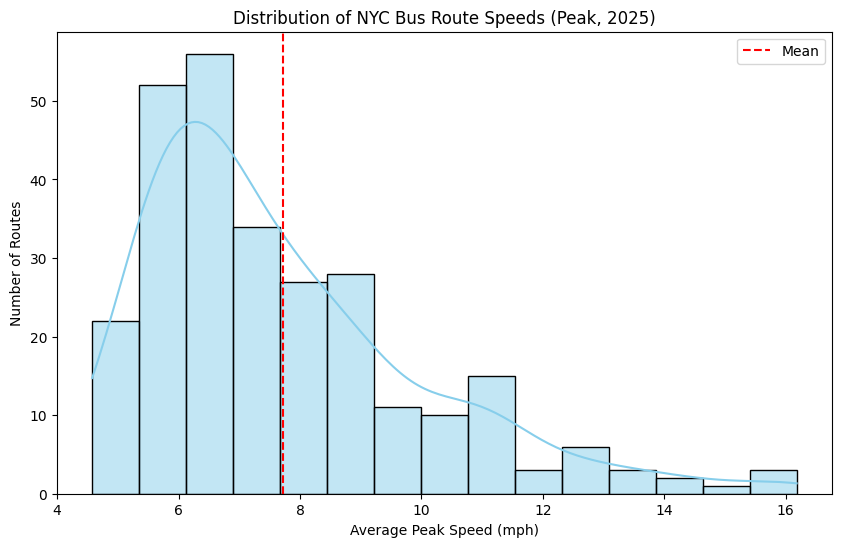

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(route_speeds['avg_speed_peak_2025'], bins=15, kde=True, color='skyblue')
plt.axvline(route_speeds['avg_speed_peak_2025'].mean(), color='red', linestyle='--', label='Mean')
plt.xlabel("Average Peak Speed (mph)")
plt.ylabel("Number of Routes")
plt.title("Distribution of NYC Bus Route Speeds (Peak, 2025)")
plt.legend()
plt.show()


In [17]:
# Define thresholds
thresholds = [5, 7, 9, 11]  # mph

for t in thresholds:
    pct = (route_speeds['avg_speed_peak_2025'] <= t).mean() * 100
    print(f"{pct:.1f}% of routes ≤ {t} mph")


2.2% of routes ≤ 5 mph
49.8% of routes ≤ 7 mph
77.3% of routes ≤ 9 mph
89.4% of routes ≤ 11 mph


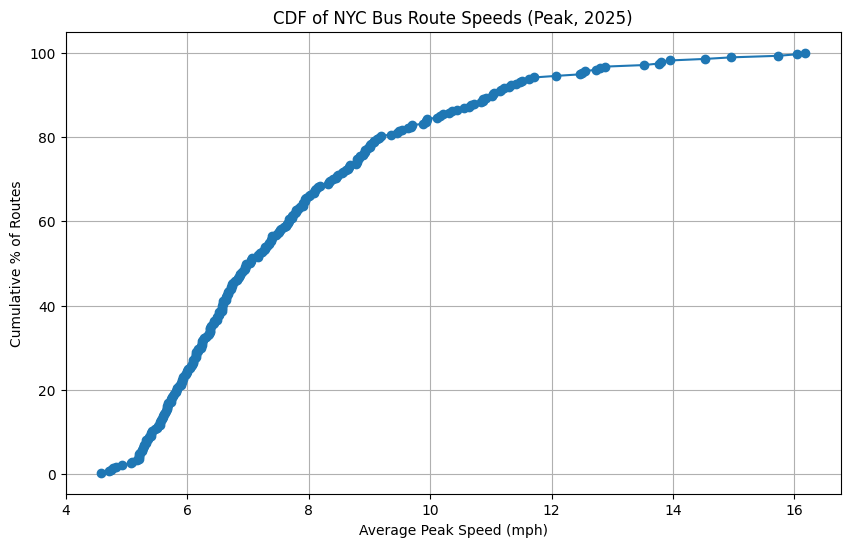

In [18]:
sorted_speeds = route_speeds['avg_speed_peak_2025'].sort_values()
cum_pct = sorted_speeds.rank(pct=True) * 100

plt.figure(figsize=(10,6))
plt.plot(sorted_speeds, cum_pct, marker='o', linestyle='-')
plt.xlabel("Average Peak Speed (mph)")
plt.ylabel("Cumulative % of Routes")
plt.title("CDF of NYC Bus Route Speeds (Peak, 2025)")
plt.grid(True)
plt.show()


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Define speed bins (mph)
bins = [0, 5, 7, 9, 11, 15]  # adjust as needed
labels = ['≤5 mph', '5-7 mph', '7-9 mph', '9-11 mph', '>11 mph']

route_speeds['speed_bin'] = pd.cut(route_speeds['avg_speed_peak_2025'], bins=bins, labels=labels, right=False)
speed_pct = route_speeds['speed_bin'].value_counts(normalize=True).sort_index() * 100
speed_pct


speed_bin
≤5 mph       2.222222
5-7 mph     48.148148
7-9 mph     27.777778
9-11 mph    12.222222
>11 mph      9.629630
Name: proportion, dtype: float64

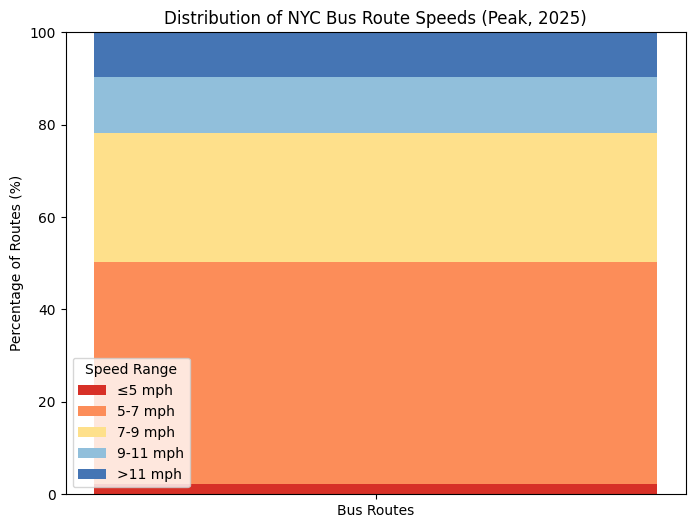

In [20]:
plt.figure(figsize=(8,6))

# Plot a single stacked bar
bottom = 0
colors = ['#d73027','#fc8d59','#fee08b','#91bfdb','#4575b4']

for i, label in enumerate(speed_pct.index):
    plt.bar('Bus Routes', speed_pct[label], bottom=bottom, color=colors[i], label=label)
    bottom += speed_pct[label]

plt.ylabel("Percentage of Routes (%)")
plt.title("Distribution of NYC Bus Route Speeds (Peak, 2025)")
plt.legend(title="Speed Range")
plt.ylim(0,100)
plt.show()


In [ ]:
#Bus Service

In [21]:
# Path to data folder relative to the notebook
DATA_DIR = os.path.join("..", "data", "raw")
bus_service_df_2015 = pd.read_csv(os.path.join(DATA_DIR, "MTA_Bus_Service_Delivered__2015-2019_20250819.csv"))
bus_service_df_2020 = pd.read_csv(os.path.join(DATA_DIR, "MTA_Bus_Service_Delivered__2020_-_2024_20250819.csv"))
bus_service_df_2025 = pd.read_csv(os.path.join(DATA_DIR, "MTA_Bus_Service_Delivered__Beginning_2025_20250819.csv"))


In [22]:
# Append (stack them vertically)
df_bus_service = pd.concat([bus_service_df_2015, bus_service_df_2020, bus_service_df_2025], ignore_index=True)
df_bus_service

,month,borough,day_type,trip_type,route_id,period,actual_number_of_buses,scheduled_number_of_buses,service_delivered
0,2015-01-01,Bronx,1,LCL/LTD,BX1,Peak,814,843,0.965599
1,2015-01-01,Bronx,2,LCL/LTD,BX1,Peak,162,179,0.905028
2,2015-01-01,Bronx,1,LCL/LTD,BX10,Peak,698,759,0.919631
3,2015-01-01,Bronx,2,LCL/LTD,BX10,Peak,171,191,0.895288
4,2015-01-01,Bronx,1,LCL/LTD,BX11,Peak,990,1041,0.951009
...,...,...,...,...,...,...,...,...,...
74527,2025-06-01,Staten Island,1,EXP,SIM6,Peak,661,801,0.825218
74528,2025-06-01,Staten Island,1,EXP,SIM7,Peak,394,462,0.852814
74529,2025-06-01,Staten Island,1,EXP,SIM8,Peak,571,630,0.906349
74530,2025-06-01,Staten Island,1,EXP,SIM8X,Peak,193,253,0.762846


In [24]:
import pandas as pd

# 1. Filter out Express buses
df_bus_service_local = df_bus_service[df_bus_service["trip_type"] != "EXP"]

# 2. Extract year from month
df_bus_service_local["year"] = pd.to_datetime(df_bus_service_local["month"]).dt.year

# 3. Group by year and compute SUM(scheduled_number_of_buses)/SUM(actual_number_of_buses)
service_ratio_by_year = (
    df_bus_service_local
    .groupby("year")
    .apply(lambda g: g["actual_number_of_buses"].sum() / g["scheduled_number_of_buses"].sum())
    .reset_index(name="scheduled_to_actual_ratio")
)

print(service_ratio_by_year)


    year  scheduled_to_actual_ratio
0   2015                   0.955053
1   2016                   0.973157
2   2017                   0.973458
3   2018                   0.972414
4   2019                   0.952244
5   2020                   0.945869
6   2021                   0.913545
7   2022                   0.924251
8   2023                   0.929330
9   2024                   0.921563
10  2025                   0.936000


/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_71327/494258796.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bus_service_local["year"] = pd.to_datetime(df_bus_service_local["month"]).dt.year
/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_71327/494258796.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g["actual_number_of_buses"].sum() / g["scheduled_number_of_buses"].sum())


In [ ]:
import pandas as pd

# 1. Filter out Express buses
df_bus_service_local = df_bus_service[df_bus_service["trip_type"] != "EXP"]

# 2. Extract year from month
df_bus_service_local["year"] = pd.to_datetime(df_bus_service_local["month"]).dt.year

# 3. Group by year and compute SUM(scheduled_number_of_buses)/SUM(actual_number_of_buses)
service_ratio_by_year = (
    df_bus_service_local
    .groupby("year")
    .apply(lambda g: g["actual_number_of_buses"].sum() / g["scheduled_number_of_buses"].sum())
    .reset_index(name="scheduled_to_actual_ratio")
)

print(service_ratio_by_year)


In [29]:
import pandas as pd

# 1. Filter out Express buses
df_local = df_bus_service[df_bus_service["trip_type"] != "EXP"]

# 2. Extract year from month
df_local["year"] = pd.to_datetime(df_local["month"]).dt.year

df_local = df_local[df_local["year"] > 2024]

# 2. Group by day_type and period
service_ratio_by_day_period = (
    df_local
    .groupby("borough")
    .apply(lambda g: g["actual_number_of_buses"].sum() / g["scheduled_number_of_buses"].sum())
    .reset_index(name="scheduled_to_actual_ratio")
)

print(service_ratio_by_day_period)


         borough  scheduled_to_actual_ratio
0          Bronx                   0.923459
1       Brooklyn                   0.935649
2      Manhattan                   0.942112
3         Queens                   0.949719
4  Staten Island                   0.883043


/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_71327/2587905856.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_local["year"] = pd.to_datetime(df_local["month"]).dt.year
/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_71327/2587905856.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g["actual_number_of_buses"].sum() / g["scheduled_number_of_buses"].sum())


In [30]:
#Bus Wait Assessment
#Wait Assessment measures how evenly buses 
#are spaced.
'''
Wait Assessment (WA) measures how evenly buses are spaced. It is defined as the percentage of actual
intervals between buses that are no more than three minutes over the scheduled interval for the
morning (7 a.m. to 9 a.m.) and afternoon (4 p.m. to 7 p.m.) peak periods and no more than five minutes
over the scheduled interval for the rest of the day (off-peak).
'''

In [41]:
# Path to data folder relative to the notebook
DATA_DIR = os.path.join("..", "data", "raw")
bus_wait_df_2015 = pd.read_csv(os.path.join(DATA_DIR, "MTA_Bus_Wait_Assessment__2015-2019_20250819.csv"))
bus_wait_df_2020 = pd.read_csv(os.path.join(DATA_DIR, "MTA_Bus_Wait_Assessment__2020_-_2024_20250819.csv"))
bus_wait_df_2025 = pd.read_csv(os.path.join(DATA_DIR, "MTA_Bus_Wait_Assessment__Beginning_2025_20250819.csv"))


In [42]:
# Append (stack them vertically)
df_bus_wait = pd.concat([bus_wait_df_2015, bus_wait_df_2020, bus_wait_df_2025], ignore_index=True)
df_bus_wait

,month,borough,day_type,trip_type,route_id,period,number_of_trips_passing_wait,number_of_scheduled_trips,wait_assessment
0,2015-01-01,Bronx,1,LCL/LTD,BX1,Off-Peak,15722,19586,0.802716
1,2015-01-01,Bronx,1,LCL/LTD,BX1,Peak,7381,10468,0.705101
2,2015-01-01,Bronx,2,LCL/LTD,BX1,Off-Peak,4972,7774,0.639568
3,2015-01-01,Bronx,2,LCL/LTD,BX1,Peak,2021,3304,0.611683
4,2015-01-01,Bronx,1,LCL/LTD,BX10,Off-Peak,11055,13678,0.808232
...,...,...,...,...,...,...,...,...,...
148617,2025-06-01,Staten Island,1,EXP,SIM8,Peak,1207,1899,0.635598
148618,2025-06-01,Staten Island,1,EXP,SIM8X,Off-Peak,24,51,0.470588
148619,2025-06-01,Staten Island,1,EXP,SIM8X,Peak,165,345,0.478261
148620,2025-06-01,Staten Island,1,EXP,SIM9,Off-Peak,529,686,0.771137


In [34]:
import pandas as pd

# 1. Filter out Express buses
df_bus_wait = df_bus_wait[df_bus_wait["trip_type"] != "EXP"]

df_bus_wait["month"] = pd.to_datetime(df_bus_wait["month"])
df_bus_wait["year"] = df_bus_wait["month"].dt.year

yearly_wait_assessment = (
    df_bus_wait.groupby("year")
    .agg(
        total_passing=("number_of_trips_passing_wait", "sum"),
        total_scheduled=("number_of_scheduled_trips", "sum")
    )
    .assign(wait_assessment=lambda x: x["total_passing"] / x["total_scheduled"])
    [["wait_assessment"]]  # keep only wait_assessment
    .reset_index()
)

print(yearly_wait_assessment)


    year  wait_assessment
0   2015         0.769487
1   2016         0.788920
2   2017         0.780925
3   2018         0.780200
4   2019         0.734103
5   2020         0.751367
6   2021         0.705791
7   2022         0.706848
8   2023         0.711610
9   2024         0.685035
10  2025         0.701775


/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_71327/2244288170.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bus_wait["month"] = pd.to_datetime(df_bus_wait["month"])
/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_71327/2244288170.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bus_wait["year"] = df_bus_wait["month"].dt.year


In [36]:
import pandas as pd

# 1. Filter out Express buses
df_bus_wait = df_bus_wait[df_bus_wait["trip_type"] != "EXP"]

df_bus_wait["month"] = pd.to_datetime(df_bus_wait["month"])
df_bus_wait["year"] = df_bus_wait["month"].dt.year

df_bus_wait = df_bus_wait[df_bus_wait["year"] > 2024]

yearly_wait_assessment = (
    df_bus_wait.groupby("borough")
    .agg(
        total_passing=("number_of_trips_passing_wait", "sum"),
        total_scheduled=("number_of_scheduled_trips", "sum")
    )
    .assign(wait_assessment=lambda x: x["total_passing"] / x["total_scheduled"])
    [["wait_assessment"]]  # keep only wait_assessment
    .reset_index()
)

print(yearly_wait_assessment)


         borough  wait_assessment
0          Bronx         0.697754
1       Brooklyn         0.662103
2      Manhattan         0.726104
3         Queens         0.733265
4  Staten Island         0.667913


In [37]:
import pandas as pd

# 1. Filter out Express buses
df_bus_wait = df_bus_wait[df_bus_wait["trip_type"] != "EXP"]

df_bus_wait["month"] = pd.to_datetime(df_bus_wait["month"])
df_bus_wait["year"] = df_bus_wait["month"].dt.year

df_bus_wait = df_bus_wait[df_bus_wait["year"] > 2024]

yearly_wait_assessment = (
    df_bus_wait.groupby(["borough","day_type"])
    .agg(
        total_passing=("number_of_trips_passing_wait", "sum"),
        total_scheduled=("number_of_scheduled_trips", "sum")
    )
    .assign(wait_assessment=lambda x: x["total_passing"] / x["total_scheduled"])
    [["wait_assessment"]]  # keep only wait_assessment
    .reset_index()
)

print(yearly_wait_assessment)


         borough  day_type  wait_assessment
0          Bronx         1         0.693612
1          Bronx         2         0.712199
2       Brooklyn         1         0.665279
3       Brooklyn         2         0.652499
4      Manhattan         1         0.736522
5      Manhattan         2         0.694408
6         Queens         1         0.730785
7         Queens         2         0.742038
8  Staten Island         1         0.657035
9  Staten Island         2         0.711060


In [38]:
import pandas as pd

# 1. Filter out Express buses
df_bus_wait = df_bus_wait[df_bus_wait["trip_type"] != "EXP"]

df_bus_wait["month"] = pd.to_datetime(df_bus_wait["month"])
df_bus_wait["year"] = df_bus_wait["month"].dt.year

df_bus_wait = df_bus_wait[df_bus_wait["year"] > 2024]

yearly_wait_assessment = (
    df_bus_wait.groupby(["borough","period"])
    .agg(
        total_passing=("number_of_trips_passing_wait", "sum"),
        total_scheduled=("number_of_scheduled_trips", "sum")
    )
    .assign(wait_assessment=lambda x: x["total_passing"] / x["total_scheduled"])
    [["wait_assessment"]]  # keep only wait_assessment
    .reset_index()
)

print(yearly_wait_assessment)


         borough    period  wait_assessment
0          Bronx  Off-Peak         0.722641
1          Bronx      Peak         0.646088
2       Brooklyn  Off-Peak         0.678109
3       Brooklyn      Peak         0.625120
4      Manhattan  Off-Peak         0.743182
5      Manhattan      Peak         0.687128
6         Queens  Off-Peak         0.758510
7         Queens      Peak         0.679527
8  Staten Island  Off-Peak         0.703866
9  Staten Island      Peak         0.590715


In [43]:
import pandas as pd

# 1. Filter out Express buses
df_bus_wait = df_bus_wait[df_bus_wait["trip_type"] != "EXP"]

df_bus_wait["month"] = pd.to_datetime(df_bus_wait["month"])
df_bus_wait["year"] = df_bus_wait["month"].dt.year

#df_bus_wait = df_bus_wait[df_bus_wait["year"] > 2024]

yearly_wait_assessment = (
    df_bus_wait.groupby(["year","day_type"])
    .agg(
        total_passing=("number_of_trips_passing_wait", "sum"),
        total_scheduled=("number_of_scheduled_trips", "sum")
    )
    .assign(wait_assessment=lambda x: x["total_passing"] / x["total_scheduled"])
    [["wait_assessment"]]  # keep only wait_assessment
    .reset_index()
)

print(yearly_wait_assessment)


    year  day_type  wait_assessment
0   2015         1         0.771097
1   2015         2         0.764311
2   2016         1         0.783355
3   2016         2         0.806350
4   2017         1         0.775375
5   2017         2         0.798174
6   2018         1         0.773760
7   2018         2         0.800380
8   2019         1         0.730854
9   2019         2         0.744225
10  2020         1         0.747040
11  2020         2         0.764388
12  2021         1         0.701753
13  2021         2         0.718356
14  2022         1         0.703923
15  2022         2         0.715750
16  2023         1         0.709833
17  2023         2         0.717045
18  2024         1         0.683215
19  2024         2         0.690622
20  2025         1         0.702114
21  2025         2         0.700647


/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_71327/3634949772.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bus_wait["month"] = pd.to_datetime(df_bus_wait["month"])
/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_71327/3634949772.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bus_wait["year"] = df_bus_wait["month"].dt.year


In [44]:
import pandas as pd

# 1. Filter out Express buses
df_bus_wait = df_bus_wait[df_bus_wait["trip_type"] != "EXP"]

df_bus_wait["month"] = pd.to_datetime(df_bus_wait["month"])
df_bus_wait["year"] = df_bus_wait["month"].dt.year

#df_bus_wait = df_bus_wait[df_bus_wait["year"] > 2024]

yearly_wait_assessment = (
    df_bus_wait.groupby(["year","period"])
    .agg(
        total_passing=("number_of_trips_passing_wait", "sum"),
        total_scheduled=("number_of_scheduled_trips", "sum")
    )
    .assign(wait_assessment=lambda x: x["total_passing"] / x["total_scheduled"])
    [["wait_assessment"]]  # keep only wait_assessment
    .reset_index()
)

print(yearly_wait_assessment)


    year    period  wait_assessment
0   2015  Off-Peak         0.796253
1   2015      Peak         0.712001
2   2016  Off-Peak         0.815980
3   2016      Peak         0.731021
4   2017  Off-Peak         0.809243
5   2017      Peak         0.720225
6   2018  Off-Peak         0.807602
7   2018      Peak         0.721704
8   2019  Off-Peak         0.760404
9   2019      Peak         0.676234
10  2020  Off-Peak         0.771830
11  2020      Peak         0.704274
12  2021  Off-Peak         0.727447
13  2021      Peak         0.657673
14  2022  Off-Peak         0.730398
15  2022      Peak         0.654827
16  2023  Off-Peak         0.734811
17  2023      Peak         0.660279
18  2024  Off-Peak         0.707327
19  2024      Peak         0.635851
20  2025  Off-Peak         0.723665
21  2025      Peak         0.653792


In [ ]:
#Mean Distance Between repair

In [45]:
# Path to data folder relative to the notebook
DATA_DIR = os.path.join("..", "data", "raw")
bus_repair_df_2015 = pd.read_csv(os.path.join(DATA_DIR, "MTA_Bus_Mean_Distance_Between_Failures__Beginning_2015_20250819.csv"))

#data/raw/MTA_Bus_Mean_Distance_Between_Failures__Beginning_2015_20250819.csv

In [46]:
bus_repair_df_2015

,Month,Borough,Monthly Miles,Monthly Road Call Count,Monthly MDBF
0,06/01/2025,Bronx,2091977,978,2139
1,06/01/2025,Brooklyn,2776380,709,3916
2,06/01/2025,Manhattan,1281985,514,2494
3,06/01/2025,Queens,4246399,822,5166
4,06/01/2025,Staten Island,2146532,362,5930
...,...,...,...,...,...
625,01/01/2015,Bronx,2166371,434,4992
626,01/01/2015,Brooklyn,2901602,576,5038
627,01/01/2015,Manhattan,1283763,458,2803
628,01/01/2015,Queens,4032200,810,4978


In [48]:
import pandas as pd

# ensure Month is datetime
bus_repair_df_2015["Month"] = pd.to_datetime(bus_repair_df_2015["Month"])

# extract year
bus_repair_df_2015["year"] = bus_repair_df_2015["Month"].dt.year

# group by year and compute average MDBF
yearly_mdbf = (
    bus_repair_df_2015.groupby("year")["Monthly MDBF"]
    .agg(total_mdbf="sum", months="count")
    .assign(Annual_MDBF=lambda x: x["total_mdbf"] / x["months"])
    [["Annual_MDBF"]]
    .reset_index()
)

print(yearly_mdbf)


    year   Annual_MDBF
0   2015   5316.583333
1   2016   8442.683333
2   2017   8839.633333
3   2018   8468.316667
4   2019   9753.433333
5   2020  11348.216667
6   2021   9886.000000
7   2022   9113.083333
8   2023   8965.700000
9   2024   8085.716667
10  2025   6627.433333


In [50]:
import pandas as pd

# ensure Month is datetime
bus_repair_df_2015["Month"] = pd.to_datetime(bus_repair_df_2015["Month"])

# extract year
bus_repair_df_2015["year"] = bus_repair_df_2015["Month"].dt.year

# group by year & borough
borough_yearly_mdbf = (
    bus_repair_df_2015.groupby("Borough")["Monthly MDBF"]
    .agg(total_mdbf="sum", months="count")
    .assign(Annual_MDBF=lambda x: x["total_mdbf"] / x["months"])
    [["Annual_MDBF"]]
    .reset_index()
)

print(borough_yearly_mdbf.head())


         Borough   Annual_MDBF
0          Bronx   4914.595238
1       Brooklyn   7129.325397
2      Manhattan   4179.301587
3         Queens   7117.071429
4  Staten Island  20246.888889


In [51]:
import pandas as pd

# make sure Month is datetime
bus_repair_df_2015["Month"] = pd.to_datetime(bus_repair_df_2015["Month"])
bus_repair_df_2015["year"] = bus_repair_df_2015["Month"].dt.year

# filter for 2024 and 2025
df_24_25 = bus_repair_df_2015[bus_repair_df_2015["year"].between(2024, 2025)]

# group by borough, sum & count months, then divide
mdbf_24_25 = (
    df_24_25.groupby("Borough")["Monthly MDBF"]
    .agg(total_mdbf="sum", months="count")
    .assign(Average_MDBF=lambda x: x["total_mdbf"] / x["months"])
    [["Average_MDBF"]]
    .reset_index()
)

print(mdbf_24_25)


         Borough  Average_MDBF
0          Bronx   3642.055556
1       Brooklyn   5680.833333
2      Manhattan   3910.111111
3         Queens   7661.111111
4  Staten Island  17104.000000


In [52]:
#MTA BUS CUSTOMER METRICS
#additional_bus_stop_time	additional_travel_time	customer_journey_time_performance

In [58]:
# Path to data folder relative to the notebook
DATA_DIR = os.path.join("..", "data", "raw")
bus_jrny_df_2017 = pd.read_csv(os.path.join(DATA_DIR, "MTA_Bus_Customer_Journey-Focused_Metrics__2017-2019_20250819.csv"))
bus_jrny_df_2020 = pd.read_csv(os.path.join(DATA_DIR, "MTA_Bus_Customer_Journey-Focused_Metrics__2020_-_2024_20250819.csv"))
bus_jrny_df_2025 = pd.read_csv(os.path.join(DATA_DIR, "MTA_Bus_Customer_Journey-Focused_Metrics__Beginning_2025_20250819.csv"))


In [59]:
# Append (stack them vertically)
df_bus_jrny = pd.concat([bus_jrny_df_2017, bus_jrny_df_2020, bus_jrny_df_2025], ignore_index=True)
df_bus_jrny

,month,borough,trip_type,route_id,period,number_of_customers,additional_bus_stop_time,additional_travel_time,customer_journey_time_performance
0,2017-08-01,Bronx,LCL/LTD,BX1,Off-Peak,219531.6357,2.051653,0.696010,0.702000
1,2017-08-01,Bronx,LCL/LTD,BX1,Peak,144822.4045,1.963801,0.855400,0.683975
2,2017-08-01,Bronx,LCL/LTD,BX10,Off-Peak,142222.1974,1.262757,0.150511,0.782773
3,2017-08-01,Bronx,LCL/LTD,BX10,Peak,98257.1695,0.869035,-0.195989,0.856885
4,2017-08-01,Bronx,LCL/LTD,BX11,Off-Peak,177312.8567,1.555327,0.228310,0.772576
...,...,...,...,...,...,...,...,...,...
59791,2025-06-01,Staten Island,EXP,SIM8,Peak,16360.0680,3.393519,-1.277487,0.623641
59792,2025-06-01,Staten Island,EXP,SIM8X,Off-Peak,1229.3618,1.944977,2.812578,0.523087
59793,2025-06-01,Staten Island,EXP,SIM8X,Peak,3871.9280,5.324001,-5.086084,0.642905
59794,2025-06-01,Staten Island,EXP,SIM9,Off-Peak,3657.7850,2.361098,-6.290325,0.852582


In [60]:
import pandas as pd

# 1. Filter out Express buses
df_bus_jrny = df_bus_jrny[df_bus_jrny["trip_type"] != "EXP"]

# make sure month is datetime
df_bus_jrny["month"] = pd.to_datetime(df_bus_jrny["month"])

# extract year
df_bus_jrny["year"] = df_bus_jrny["month"].dt.year

# group by year and compute averages
yearly_journey_perf = (
    df_bus_jrny.groupby("year")
    .agg(
        additional_bus_stop_time_sum=("additional_bus_stop_time", "sum"),
        additional_travel_time_sum=("additional_travel_time", "sum"),
        customer_journey_time_performance_sum=("customer_journey_time_performance", "sum"),
        records=("month", "count")
    )
    .assign(
        avg_additional_bus_stop_time=lambda x: x["additional_bus_stop_time_sum"] / x["records"],
        avg_additional_travel_time=lambda x: x["additional_travel_time_sum"] / x["records"],
        avg_customer_journey_time_performance=lambda x: x["customer_journey_time_performance_sum"] / x["records"]
    )
    [["avg_additional_bus_stop_time", "avg_additional_travel_time", "avg_customer_journey_time_performance"]]
    .reset_index()
)

print(yearly_journey_perf)


   year  avg_additional_bus_stop_time  avg_additional_travel_time  \
0  2017                      2.078737                    0.935338   
1  2018                      1.974035                    0.767853   
2  2019                      2.407678                    1.110827   
3  2020                      2.257264                    0.173992   
4  2021                      2.873868                    0.227701   
5  2022                      2.790826                    0.674259   
6  2023                      2.695352                    0.786603   
7  2024                      3.081756                    0.941573   
8  2025                      2.779832                    0.808098   

   avg_customer_journey_time_performance  
0                               0.701107  
1                               0.717219  
2                               0.686959  
3                               0.753014  
4                               0.729350  
5                               0.700642  
6       

/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_71327/269173781.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bus_jrny["month"] = pd.to_datetime(df_bus_jrny["month"])
/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_71327/269173781.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bus_jrny["year"] = df_bus_jrny["month"].dt.year


/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_71327/1137166725.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bus_jrny["month"] = pd.to_datetime(df_bus_jrny["month"])
/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_71327/1137166725.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bus_jrny["year"] = df_bus_jrny["month"].dt.year


       additional_bus_stop_time  additional_travel_time  \
count               9346.000000             9346.000000   
mean                   2.980382                0.896757   
std                    1.934714                1.004087   
min                   -1.374703               -3.469277   
25%                    1.922337                0.232427   
50%                    2.610774                0.832491   
75%                    3.567765                1.510259   
max                   48.621685                6.369302   

       customer_journey_time_performance  
count                        9346.000000  
mean                            0.674398  
std                             0.100182  
min                             0.000000  
25%                             0.615485  
50%                             0.679272  
75%                             0.740832  
max                             0.969720  


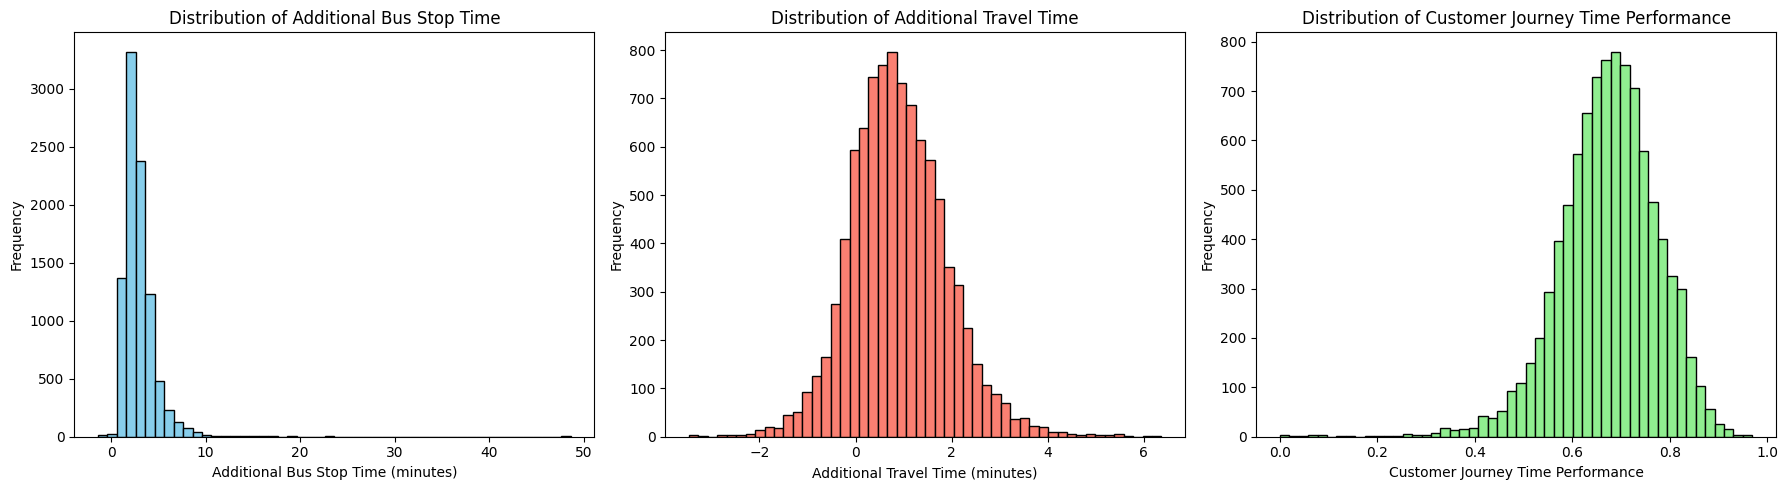

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# make sure month is datetime
df_bus_jrny["month"] = pd.to_datetime(df_bus_jrny["month"])
df_bus_jrny["year"] = df_bus_jrny["month"].dt.year

# filter for 2024 and 2025
df_24_25 = df_bus_jrny[df_bus_jrny["year"].between(2024, 2025)]

# Option 1: get summary statistics
distribution_summary = df_24_25[[
    "additional_bus_stop_time", 
    "additional_travel_time", 
    "customer_journey_time_performance"
]].describe()

print(distribution_summary)

# Option 2: visualize histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(df_24_25["additional_bus_stop_time"], bins=50, color="skyblue", edgecolor="black")
axes[0].set_title("Distribution of Additional Bus Stop Time")
axes[0].set_xlabel("Additional Bus Stop Time (minutes)")
axes[0].set_ylabel("Frequency")

axes[1].hist(df_24_25["additional_travel_time"], bins=50, color="salmon", edgecolor="black")
axes[1].set_title("Distribution of Additional Travel Time")
axes[1].set_xlabel("Additional Travel Time (minutes)")
axes[1].set_ylabel("Frequency")

axes[2].hist(df_24_25["customer_journey_time_performance"], bins=50, color="lightgreen", edgecolor="black")
axes[2].set_title("Distribution of Customer Journey Time Performance")
axes[2].set_xlabel("Customer Journey Time Performance")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [62]:
import pandas as pd

# make sure month is datetime
df_bus_jrny["month"] = pd.to_datetime(df_bus_jrny["month"])

# extract year
df_bus_jrny["year"] = df_bus_jrny["month"].dt.year

# group by year and compute averages
yearly_journey_perf = (
    df_bus_jrny.groupby(["year","period"])
    .agg(
        additional_bus_stop_time_sum=("additional_bus_stop_time", "sum"),
        additional_travel_time_sum=("additional_travel_time", "sum"),
        customer_journey_time_performance_sum=("customer_journey_time_performance", "sum"),
        records=("month", "count")
    )
    .assign(
        avg_additional_bus_stop_time=lambda x: x["additional_bus_stop_time_sum"] / x["records"],
        avg_additional_travel_time=lambda x: x["additional_travel_time_sum"] / x["records"],
        avg_customer_journey_time_performance=lambda x: x["customer_journey_time_performance_sum"] / x["records"]
    )
    [["avg_additional_bus_stop_time", "avg_additional_travel_time", "avg_customer_journey_time_performance"]]
    .reset_index()
)

print(yearly_journey_perf)


    year    period  avg_additional_bus_stop_time  avg_additional_travel_time  \
0   2017  Off-Peak                      2.119318                    0.807216   
1   2017      Peak                      2.038157                    1.063461   
2   2018  Off-Peak                      2.018835                    0.668189   
3   2018      Peak                      1.929235                    0.867517   
4   2019  Off-Peak                      2.425199                    1.015988   
5   2019      Peak                      2.390069                    1.206140   
6   2020  Off-Peak                      2.335169                    0.228751   
7   2020      Peak                      2.178747                    0.118805   
8   2021  Off-Peak                      2.970710                    0.325557   
9   2021      Peak                      2.775714                    0.128520   
10  2022  Off-Peak                      2.824103                    0.703851   
11  2022      Peak                      

/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_71327/2344234876.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bus_jrny["month"] = pd.to_datetime(df_bus_jrny["month"])
/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_71327/2344234876.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bus_jrny["year"] = df_bus_jrny["month"].dt.year


In [ ]:
#Bus Lane Infrastracture

In [97]:
# Path to data folder relative to the notebook
DATA_DIR = os.path.join("..", "data", "raw")
bus_lane_df = pd.read_csv(os.path.join(DATA_DIR, "bus_lanes_by_type.csv"))
bus_lane_df_type = pd.read_csv(os.path.join(DATA_DIR, "bus_lanes_built_upgraded.csv"))
#bus_jrny_df_2025 = pd.read_csv(os.path.join(DATA_DIR, "MTA_Bus_Customer_Journey-Focused_Metrics__Beginning_2025_20250819.csv"))


In [98]:
# Total miles of bus lanes by type
bus_lane_df

,Lane_Type,Mileage
0,Curbside,77.33
1,Offset,66.60
2,Median/Center-Running,6.84
3,Busway,5.72
4,Other,4.71
5,Uncategorized,1.68


In [99]:
#Miles of bus lanes built and upgraded (2020-2024)
bus_lane_df_type

,Year,New_Lane_Miles,Miles_Upgraded
0,2024,5.48,13.5
1,2023,15.70,5.2
2,2022,7.80,4.4
3,2021,12.90,NaN
4,2020,16.30,NaN


In [100]:
#Employee Headcount
'''Bus service within New York City is operated by MTA agencies New York City Transit (NYCT) and MTA
Bus Company (MTABC). Some NYCT bus service is operated through the Manhattan and Bronx Surface
Transit Operating Authority (MaBSTOA), which is a subsidiary of NYCT.'''

'Bus service within New York City is operated by MTA agencies New York City Transit (NYCT) and MTA\nBus Company (MTABC). Some NYCT bus service is operated through the Manhattan and Bronx Surface\nTransit Operating Authority (MaBSTOA), which is a subsidiary of NYCT.'

In [101]:
DATA_DIR = os.path.join("..", "data", "raw")
bus_emp_df = pd.read_csv(os.path.join(DATA_DIR, "MTA_Headcount__Beginning_2024_20250819.csv"))
bus_emp_df

,Fiscal Year,Month,Scenario,Financial Plan Year,Expense Type,Agency,Function,Occupational Group,Positions
0,2025,2025-05-01,Actual,2025,NREIMB,MTAHQ,Public Safety,Professional/Technical/Clerical,79.00
1,2025,2025-05-01,Actual,2025,REIMB,CD,Engineering,Operational Hourlies,45.00
2,2025,2025-05-01,Actual,2025,NREIMB,LIRR,Administration,Managers/Supervisors,239.90
3,2025,2025-05-01,Actual,2025,REIMB,SIR,Engineering,Professional/Technical/Clerical,1.00
4,2025,2025-05-01,Actual,2025,NREIMB,NYCT,Administration,Professional/Technical/Clerical,407.22
...,...,...,...,...,...,...,...,...,...
27091,2024,2024-01-01,Adopted Budget,2024,REIMB,SIR,Operations,Managers/Supervisors,5.00
27092,2024,2024-01-01,Adopted Budget,2025,NREIMB,MTABC,Operations,Operational Hourlies,2247.00
27093,2024,2024-01-01,Adopted Budget,2024,NREIMB,MNR,Engineering,Professional/Technical/Clerical,-2.00
27094,2024,2024-01-01,Adopted Budget,2024,REIMB,LIRR,Operations,Managers/Supervisors,8.00


In [102]:
#Bus Ridership

In [114]:
# Path to data folder relative to the notebook
DATA_DIR = os.path.join("..", "data", "raw")
bus_ridership_nyct_df_2014 = pd.read_csv(os.path.join(DATA_DIR, "nyc_transit_bus_ridership.csv"))
bus_ridership_mta_df_2014 = pd.read_csv(os.path.join(DATA_DIR, "mta_bus_company_ridership.csv"))
bus_ridership_df_2020 = pd.read_csv(os.path.join(DATA_DIR, "MTA_Daily_Ridership_Data__2020_-_2025_20250721.csv"))
bus_ridership_df_2025 = pd.read_csv(os.path.join(DATA_DIR, "MTA_Bus_Ridership_2025.csv"))
# Append (stack them vertically)
df_bus_speed = pd.concat([bus_evasion_df_2015, bus_evasion_df_2020, bus_evasion_df_2025], ignore_index=True)

In [115]:
bus_ridership_nyct_df_2014
bus_ridership_mta_df_2014

,Year,Average Weekday,Average Saturday,Average Sunday,Average Weekend,Annual Total
0,2014,407115,228304,175552,403826,125581237
1,2015,405978,228976,176503,405478,125399522
2,2016,407201,225844,174057,399902,125617157
3,2017,396229,222833,173565,396398,122214328
4,2018,392617,224751,170892,395643,121448276
5,2019,388075,228364,171762,400126,120551580


In [116]:
import pandas as pd

# Copy the Year column (assumes first column is Year)
years = bus_ridership_nyct_df_2014.iloc[:, 0]

# Add all other columns element-wise
bus_ridership_total_df_2014 = bus_ridership_nyct_df_2014.iloc[:, 1:].add(
    bus_ridership_mta_df_2014.iloc[:, 1:], fill_value=0
)

# Put Year back as first column
bus_ridership_total_df_2014.insert(0, "Year", years)

print(bus_ridership_total_df_2014)
# Create new dataframe with Year, Ridership, and Average Daily Ridership
summary_df = bus_ridership_total_df_2014[["Year", "Annual Total"]].rename(
    columns={"Annual Total": "Ridership"}
)

# Compute Average Daily Ridership
summary_df["Average Daily Ridership"] = summary_df["Ridership"] / 365

print(summary_df.head())


   Year  Average Weekday  Average Saturday  Average Sunday  Average Weekend  \
0  2014          2530207           1533741         1199831          2733542   
1  2015          2476364           1507007         1172291          2679297   
2  2016          2445320           1447143         1131484          2578627   
3  2017          2320222           1391811         1097259          2489070   
4  2018          2204222           1347377         1038949          2386326   
5  2019          2158469           1337173         1019693          2356866   

   Annual Total  
0     792632407  
1     776081306  
2     764030270  
3     724834684  
4     690809496  
5     677588084  
   Year  Ridership  Average Daily Ridership
0  2014  792632407             2.171596e+06
1  2015  776081306             2.126250e+06
2  2016  764030270             2.093234e+06
3  2017  724834684             1.985848e+06
4  2018  690809496             1.892629e+06


In [106]:
#Bus Ridership 2020-2025
bus_ridership_df_2020
import pandas as pd

# Ensure Date column is datetime
bus_ridership_df_2020["Date"] = pd.to_datetime(bus_ridership_df_2020["Date"])

# Extract year
bus_ridership_df_2020["Year"] = bus_ridership_df_2020["Date"].dt.year

# Group by year
summary_buses = (
    bus_ridership_df_2020
    .groupby("Year")
    .agg(
        Total_Ridership=("Buses: Total Estimated Ridership", "sum"),
        Days_Covered=("Date", "nunique")   # number of days with data
    )
    .reset_index()
)

# Compute average daily ridership
summary_buses["Avg_Daily_Ridership"] = (
    summary_buses["Total_Ridership"] / summary_buses["Days_Covered"]
)

#print(summary_buses)
# Drop 2025
summary_buses_clean = summary_buses[summary_buses["Year"] != 2025].copy()

# Keep only Year + Total_Ridership, rename
summary_buses_clean = summary_buses_clean[["Year", "Total_Ridership"]].rename(
    columns={"Total_Ridership": "Ridership"}
)

# Compute Average Daily Ridership (full year basis)
summary_buses_clean["Average Daily Ridership"] = summary_buses_clean["Ridership"] / 365

print(summary_buses_clean)



   Year  Ridership  Average Daily Ridership
0  2020  147387699             4.038019e+05
1  2021  381637866             1.045583e+06
2  2022  423946824             1.161498e+06
3  2023  425539799             1.165862e+06
4  2024  408872440             1.120198e+06


In [107]:
#Goes to 1/1/2025 - 8/5/2025
import pandas as pd

# Your dataframe is bus_ridership_df_2025
# Columns: ["bus_route", "ridership"]

# 1. Total ridership for given period
total_ridership = bus_ridership_df_2025["ridership"].sum()

# 2. Days covered (Jan 1 – Aug 5, 2025)
days_so_far = (pd.to_datetime("2025-08-05") - pd.to_datetime("2025-01-01")).days + 1

# 3. Daily average
daily_avg = total_ridership / days_so_far

# 4. Project full-year ridership
projected_ridership = daily_avg * 365

# 5. Create summary dataframe
summary_df_1 = pd.DataFrame({
    "Year": [2025, 2025],
    "Type": ["Actual (Jan 1–Aug 5)", "Projected (Full Year)"],
    "Ridership": [total_ridership, projected_ridership]
})

#print(summary_df)
import pandas as pd

# Days from Jan 1 – Aug 5, 2025
days_so_far = (pd.to_datetime("2025-08-05") - pd.to_datetime("2025-01-01")).days + 1

# Create a copy
summary_df_clean = summary_df_1.copy()

# Compute Average Daily Ridership
summary_df_clean["Average Daily Ridership"] = summary_df_clean.apply(
    lambda row: row["Ridership"] / days_so_far if "Actual" in row["Type"] else row["Ridership"] / 365,
    axis=1
)

# Transform to match other summary tables
summary_df_final = pd.DataFrame({
    "Year": summary_df_clean["Type"].apply(
        lambda x: "2025" if "Actual" in x else "2025*"
    ),
    "Ridership": summary_df_clean["Ridership"],
    "Average Daily Ridership": summary_df_clean["Average Daily Ridership"]
})

print(summary_df_final)




    Year     Ridership  Average Daily Ridership
0   2025  2.345365e+08             1.080813e+06
1  2025*  3.944969e+08             1.080813e+06


In [108]:
df_bus_ridership = pd.concat([summary_df, summary_buses_clean, summary_df_final], ignore_index=True)
df_bus_ridership

,Year,Ridership,Average Daily Ridership
0,2014,7.926324e+08,2.171596e+06
1,2015,7.760813e+08,2.126250e+06
2,2016,7.640303e+08,2.093234e+06
3,2017,7.248347e+08,1.985848e+06
4,2018,6.908095e+08,1.892629e+06
5,2019,6.775881e+08,1.856406e+06
6,2020,1.473877e+08,4.038019e+05
7,2021,3.816379e+08,1.045583e+06
8,2022,4.239468e+08,1.161498e+06
9,2023,4.255398e+08,1.165862e+06


In [ ]:
# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Construct the full path to the output file
output_path = os.path.join(project_root, "data", "processed", "df_bus_ridership.csv")

# Save the CSV
df_bus_ridership.to_csv(output_path, index=False)

In [110]:
bus_ridership_df_2020 = pd.read_csv(os.path.join(DATA_DIR, "MTA_Daily_Ridership_Data__2020_-_2025_20250721.csv"))
bus_ridership_df_2020
import pandas as pd

# Ensure Date column is datetime
bus_ridership_df_2020["Date"] = pd.to_datetime(bus_ridership_df_2020["Date"])

# Filter for years 2022–2025
df_filtered = bus_ridership_df_2020[
    bus_ridership_df_2020["Date"].dt.year.isin([2022, 2023, 2024, 2025])
]

# Keep only weekdays (Monday=0, ..., Sunday=6)
df_weekdays = df_filtered[df_filtered["Date"].dt.weekday < 5]

# Compute average weekday ridership for buses
avg_weekday_ridership = df_weekdays["Buses: Total Estimated Ridership"].mean()

print(f"Average weekday bus ridership (2022–2025): {avg_weekday_ridership:,.0f}")


Average weekday bus ridership (2022–2025): 1,314,135


In [ ]:
#Average Weekday Ridership Pre-Covid - 2,355,801
#Average Weekday Ridership Post-Covid - 1,314,135